In [1]:
import os
import sys
from datetime import date
from tme_utils import (
    EventTypes,
    get_client,
    query_blocks,
    query_events,
    query_receipt,
    query_state
)

# %load_ext google.cloud.bigquery
# from google.cloud import bigquery

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 5]

In [2]:
project = "celo-testnet"
dataset = "tme_test_stakeoff"
partition = "*"
table = "tme_stakeoff_test_{0}".format(partition)
# dataset = "transaction_metrics_exporter"
# partition = date.today().strftime("%Y%m%d")
# table = "transaction_metrics_exporter_{0}".format(partition)

window_min = 130000
window_max = 140000

client = get_client(project)

tme = client.get_dataset(dataset)
table_path = ".".join([project, dataset, table])
print(table_path)

celo-testnet.tme_test_stakeoff.tme_stakeoff_test_*


In [3]:
df_blocks = query_blocks(client, table_path, window_min, window_max)
df_receipt = query_receipt(client, table_path, window_min, window_max)
df_state = query_state(client, table_path, window_min, window_max, df_blocks)
df_events = query_events(client, table_path, window_min, window_max, df_state)
df_blocks.describe()

,timestamp,blockNumber,gasUsed,gasLimit,txAmount,blocktime
count,9.947000e+03,9947.000000,9.947000e+03,9947.0,9947.000000,9946.000000
mean,1.579377e+09,135004.245903,6.955377e+04,20000000.0,1.066955,5.075608
std,1.457574e+04,2889.603602,8.269996e+04,0.0,0.353007,1.333527
min,1.579352e+09,130000.000000,0.000000e+00,20000000.0,1.000000,5.000000
25%,1.579365e+09,132509.500000,0.000000e+00,20000000.0,1.000000,5.000000
50%,1.579377e+09,135005.000000,4.106900e+04,20000000.0,1.000000,5.000000
75%,1.579390e+09,137512.500000,9.979500e+04,20000000.0,1.000000,5.000000
max,1.579403e+09,140000.000000,1.488003e+06,20000000.0,5.000000,80.000000


In [4]:
df_blocks.head()

,timestamp,blockNumber,gasUsed,gasLimit,txAmount,blocktime
0,1.579403e+09,140000.0,199963.0,20000000.0,4,5.0
1,1.579403e+09,139999.0,33831.0,20000000.0,1,5.0
2,1.579403e+09,139998.0,0.0,20000000.0,1,5.0
3,1.579403e+09,139997.0,0.0,20000000.0,1,5.0
4,1.579403e+09,139996.0,0.0,20000000.0,1,5.0


last block  : 140000 on 1579402539.0
first block : 130000 on 1579352057.0
blocks load : 9947
transactions: 10613
mean gasUsed: 69554 GcWei
mean blocktime: 5.1 s


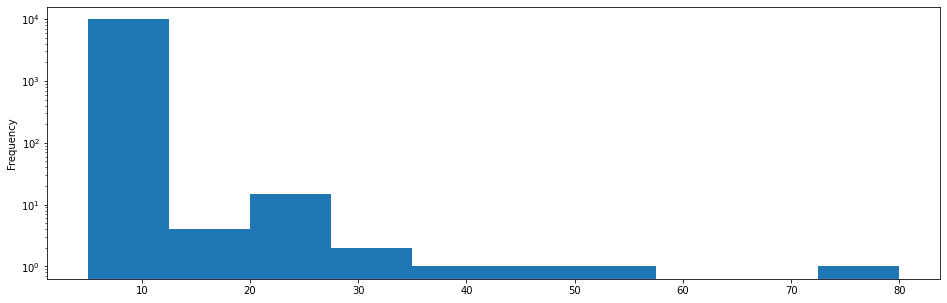

In [5]:
last_block, first_block = df_blocks.blockNumber.max(), df_blocks.blockNumber.min()
print(f"last block  : {last_block:.0f} on {df_blocks.timestamp.max()}") 
print(f"first block : {first_block:.0f} on {df_blocks.timestamp.min()}")
print(f"blocks load : {df_blocks.timestamp.count():.0f}")
print(f"transactions: {df_blocks.txAmount.sum()}")
print(f"mean gasUsed: {df_blocks.gasUsed.mean():.0f} GcWei")
df_blocks.blocktime.plot.hist(logy=True)
print(f"mean blocktime: {df_blocks.blocktime.mean():.1f} s")

In [6]:
df_state.describe()

,blockNumber,rewardsamount,rewardsmultiplier,medianRate,currentStableBucket,currentGoldBucket,goldTokenTotalSupply,timestamp_block,gasUsed,gasLimit,txAmount,blocktime
count,9944.000000,9.941000e+03,9.941000e+03,9941.000000,9.943000e+03,9.943000e+03,9.944000e+03,9.944000e+03,9.944000e+03,9944.0,9944.000000,9943.000000
mean,135004.371078,6.002873e+26,1.614614e+24,0.998768,9.973623e+23,9.982883e+23,1.089266e+26,1.579377e+09,6.954255e+04,20000000.0,1.066975,5.069597
std,2889.686398,6.162225e+21,1.716833e+19,0.000422,9.662704e+20,7.620551e+20,3.436147e+10,1.457616e+04,8.270818e+04,0.0,0.353058,1.262389
min,130000.000000,6.002766e+26,1.614584e+24,0.998000,9.963562e+23,9.905565e+23,1.089266e+26,1.579352e+09,0.000000e+00,20000000.0,1.000000,5.000000
25%,132509.750000,6.002820e+26,1.614599e+24,0.999000,9.973526e+23,9.983823e+23,1.089266e+26,1.579365e+09,0.000000e+00,20000000.0,1.000000,5.000000
50%,135004.500000,6.002873e+26,1.614614e+24,0.999000,9.973888e+23,9.983872e+23,1.089266e+26,1.579377e+09,4.106900e+04,20000000.0,1.000000,5.000000
75%,137513.250000,6.002926e+26,1.614629e+24,0.999000,9.975131e+23,9.985046e+23,1.089266e+26,1.579390e+09,9.979500e+04,20000000.0,1.000000,5.000000
max,140000.000000,6.002979e+26,1.614644e+24,0.999000,1.005550e+24,9.987040e+23,1.089266e+26,1.579403e+09,1.488003e+06,20000000.0,5.000000,80.000000


In [7]:
df_state.tail()

,blockNumber,timestamp_tme,rewardsamount,rewardsmultiplier,medianRate,currentStableBucket,currentGoldBucket,goldTokenTotalSupply,timestamp_block,gasUsed,gasLimit,txAmount,blocktime,datetime_block
9939,139996.0,2020-03-26 09:38:56.486426+00:00,6.002979e+26,1.614644e+24,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,0.0,20000000.0,1,5.0,2020-01-19 02:55:19
9940,139997.0,2020-03-26 09:38:56.789364+00:00,6.002979e+26,1.614644e+24,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,0.0,20000000.0,1,5.0,2020-01-19 02:55:24
9941,139998.0,2020-03-26 09:38:57.089741+00:00,6.002979e+26,1.614644e+24,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,0.0,20000000.0,1,5.0,2020-01-19 02:55:29
9942,139999.0,2020-03-26 09:38:57.393322+00:00,6.002979e+26,1.614644e+24,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,33831.0,20000000.0,1,5.0,2020-01-19 02:55:34
9943,140000.0,2020-03-26 09:38:57.844344+00:00,6.002979e+26,1.614644e+24,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,199963.0,20000000.0,4,5.0,2020-01-19 02:55:39


Text(0, 0.5, 'SortedOracles.medianRate')

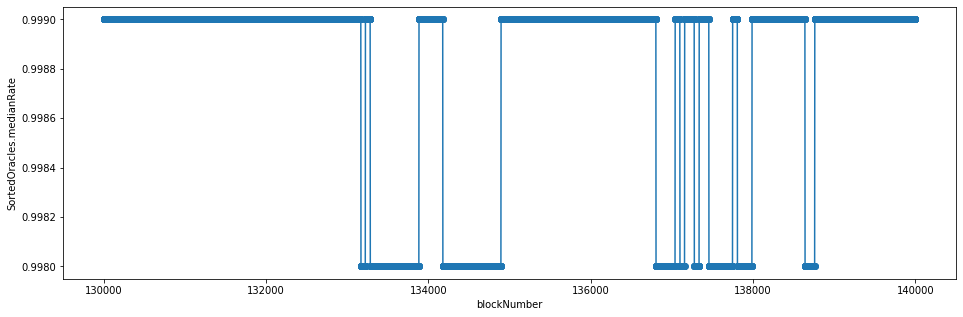

In [8]:
df_slice = df_state[1:]
df_sortedOracles = df_slice.set_index('blockNumber')['medianRate']
ax = df_sortedOracles.plot(marker='o')
ax.set_ylabel("SortedOracles.medianRate")

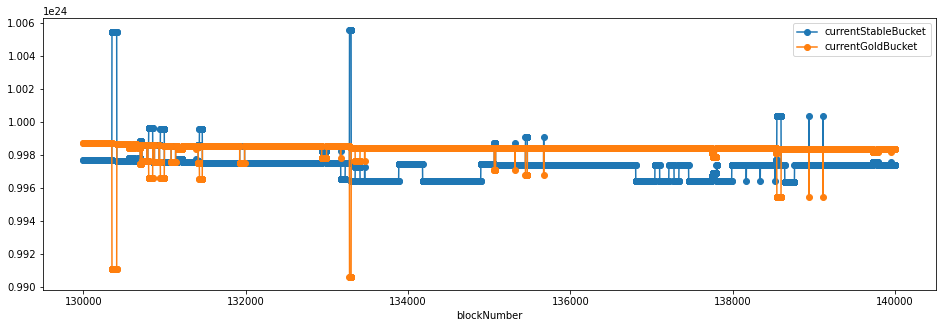

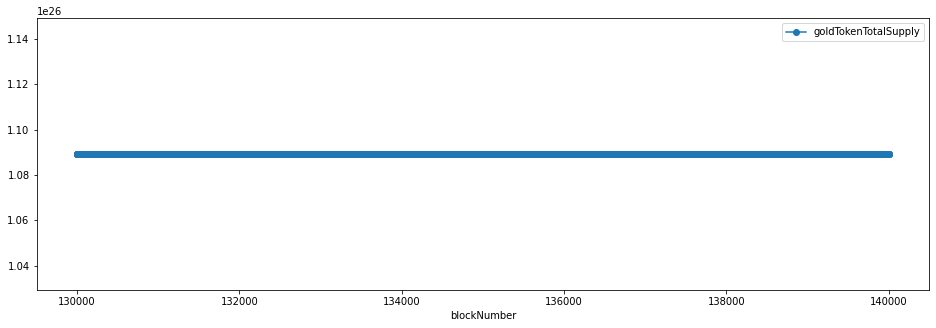

In [9]:
df_stableToken = df_state.set_index('blockNumber')[['currentStableBucket']]
ax = df_stableToken.plot(marker='o')
# df_stableToken[df_stableToken<2e24].plot(marker='o')
df_goldbucket = df_state.set_index('blockNumber')[['currentGoldBucket']]
df_goldbucket.plot(marker='o', ax=ax)
df_goldToken = df_state.set_index('blockNumber')[['goldTokenTotalSupply']]
df_goldToken.plot(marker='o')

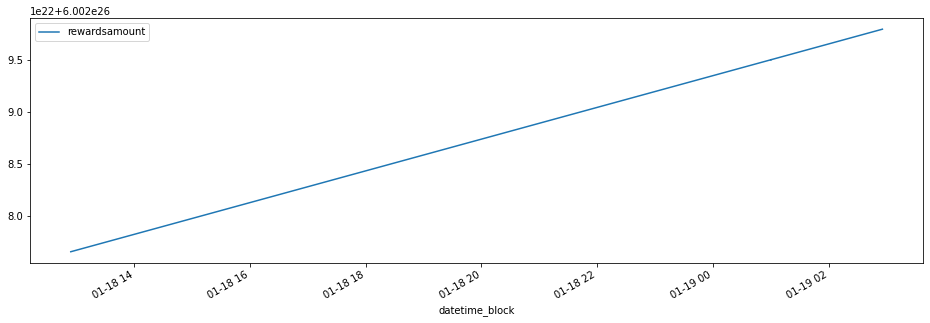

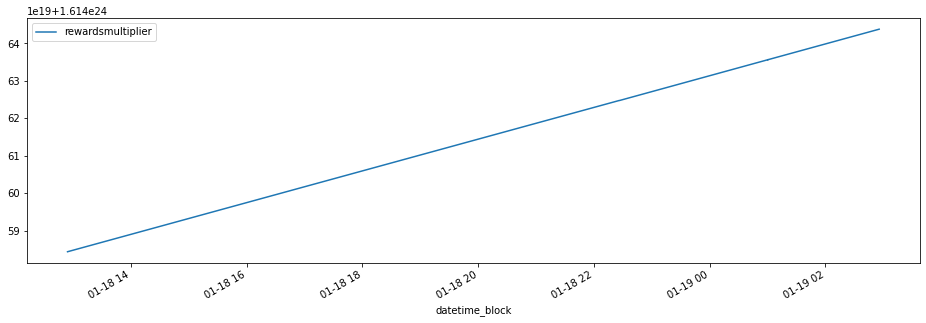

In [10]:
df_rewardsAmount = df_state.set_index('datetime_block')[['rewardsamount']]
ax = df_rewardsAmount.plot()
df_rewardsMultiplier = df_state.set_index('datetime_block')[['rewardsmultiplier']]
ax = df_rewardsMultiplier.plot()

In [11]:
df_events.describe()

,blockNumber,sellamount,buyamount,rewardsamount,rewardsmultiplier,medianRate,currentStableBucket,currentGoldBucket,goldTokenTotalSupply,timestamp_block,gasUsed,gasLimit,txAmount,blocktime
count,11129.000000,8.700000e+01,8.700000e+01,1.112900e+04,1.112900e+04,11129.000000,1.112900e+04,1.112900e+04,1.112900e+04,1.112900e+04,1.112900e+04,11129.0,11129.000000,11120.000000
mean,133197.859736,5.033395e+20,4.994235e+20,6.002834e+26,1.614603e+24,0.998804,9.975884e+23,9.982065e+23,1.089266e+26,1.579368e+09,1.351322e+05,20000000.0,1.232905,5.150809
std,2292.876782,1.252211e+21,1.238405e+21,4.886230e+21,1.361391e+19,0.000397,1.208871e+21,1.001261e+21,3.436128e+10,1.155691e+04,9.167860e+04,0.0,0.671136,1.663912
min,130000.000000,0.000000e+00,0.000000e+00,6.002766e+26,1.614584e+24,0.998000,9.963562e+23,9.905565e+23,1.089266e+26,1.579352e+09,2.651700e+04,20000000.0,1.000000,5.000000
25%,131015.000000,0.000000e+00,0.000000e+00,6.002788e+26,1.614590e+24,0.999000,9.973888e+23,9.983872e+23,1.089266e+26,1.579357e+09,7.936300e+04,20000000.0,1.000000,5.000000
50%,133061.000000,0.000000e+00,0.000000e+00,6.002831e+26,1.614603e+24,0.999000,9.975131e+23,9.984169e+23,1.089266e+26,1.579368e+09,1.204320e+05,20000000.0,1.000000,5.000000
75%,135124.000000,1.000000e+21,9.930177e+20,6.002875e+26,1.614615e+24,0.999000,9.976287e+23,9.985215e+23,1.089266e+26,1.579378e+09,1.706490e+05,20000000.0,1.000000,5.000000
max,140000.000000,8.044044e+21,7.948061e+21,6.002979e+26,1.614644e+24,0.999000,1.005550e+24,9.987040e+23,1.089266e+26,1.579403e+09,1.488003e+06,20000000.0,5.000000,80.000000


In [12]:
df_events.head()

,blockNumber,address,eventName,identifier,addr,identifierhash,slasheridentifier,account,metadataurl,value,...,medianRate,currentStableBucket,currentGoldBucket,goldTokenTotalSupply,timestamp_block,gasUsed,gasLimit,txAmount,blocktime,datetime_block
0,140000.0,0xC8FD77490A12F46709BffbCC0FCe35740Da8D860,Exchanged,None,None,None,None,None,None,None,...,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,199963.0,20000000.0,4,5.0,2020-01-19 02:55:39
1,140000.0,0x5c7197E1147ebF98658A2a8Bc3D32BeBF1692829,Transfer,None,None,None,None,None,None,0,...,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,199963.0,20000000.0,4,5.0,2020-01-19 02:55:39
2,140000.0,0x14D449EF428e679da48B3e8CfFa9036fF404B28A,Transfer,None,None,None,None,None,None,0,...,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,199963.0,20000000.0,4,5.0,2020-01-19 02:55:39
3,140000.0,0x5c7197E1147ebF98658A2a8Bc3D32BeBF1692829,Transfer,None,None,None,None,None,None,0,...,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,199963.0,20000000.0,4,5.0,2020-01-19 02:55:39
4,140000.0,0xC8FD77490A12F46709BffbCC0FCe35740Da8D860,Exchanged,None,None,None,None,None,None,None,...,0.999,9.973526e+23,9.983510e+23,1.089266e+26,1.579403e+09,199963.0,20000000.0,4,5.0,2020-01-19 02:55:39


In [13]:
df_events.groupby('eventName').eventName.count().sort_values(ascending=False)

eventName
Transfer                        10498
Approval                          204
Exchanged                          87
AttestationIssuerSelected          86
AttestationsRequested              81
AttestationCompleted               58
ValidatorGroupVoteCast             15
GoldLocked                         15
ValidatorGroupVoteActivated        13
ParticipationBaselineUpdated       13
ProposalDequeued                   10
ProposalApproved                   10
AccountMetadataURLSet               7
ValidatorAffiliated                 5
ValidatorGroupVoteRevoked           4
AccountDataEncryptionKeySet         3
AccountNameSet                      3
ValidatorSignerAuthorized           3
GoldUnlocked                        3
ValidatorRegistered                 3
AccountCreated                      3
ValidatorGroupMemberAdded           2
ProposalExecuted                    1
ProposalVoted                       1
ValidatorDeaffiliated               1
Name: eventName, dtype: int64

In [14]:
df_exchange = df_events[df_events.eventName == "Exchanged"].set_index('blockNumber')[['exchanger', 'buyamount', 'sellamount', 'soldgold']]
df_exchange.groupby('exchanger').exchanger.count().sort_values(ascending=False)

exchanger
0x8fb800b94D2b1258236E598FCd5e65eAf45CA671    19
0x73b49DA41223585a650712363BA7878Ed60a964d    19
0xd6F05649c5350c20030de1dC57eD31510141F487    15
0xcBeBE96Dd4811243e23B1f7B43d7c3266C59af2f     9
0x93c110Dc9812dc075C1541b2c5D1030B2Ad6C293     8
0x060b52F506579625aD73b99f1bE8D6B06259953D     6
0x6C5035a2a6F4818d7451747F3Ef5edFb8265e776     2
0xa87C05C4598FcF6d7Bb9F9e41EBaa05c2cb46AbD     1
0xC9D6Fe14D8e93269bd3487D1d1a7693ef60001E3     1
0x6Af7F878Dc47D3cD83507b760aba82Af45C9F902     1
0x648d9E9097E43234553058e5e04DcD68aF8AB8b0     1
0x5582268E275fC3407f92Fa80dD3F0d05904a723A     1
0x4bB62dFd16fbD3D267E3f2d6f37F3b41401c6E27     1
0x4500b26a6F52836510bfd013241DF203f03456F8     1
0x2947EA31ab65B1FEE886DC6c113F79B222c804B7     1
0x1B67145Ecb99345AA619E8bC4EE67394F8334D6f     1
Name: exchanger, dtype: int64

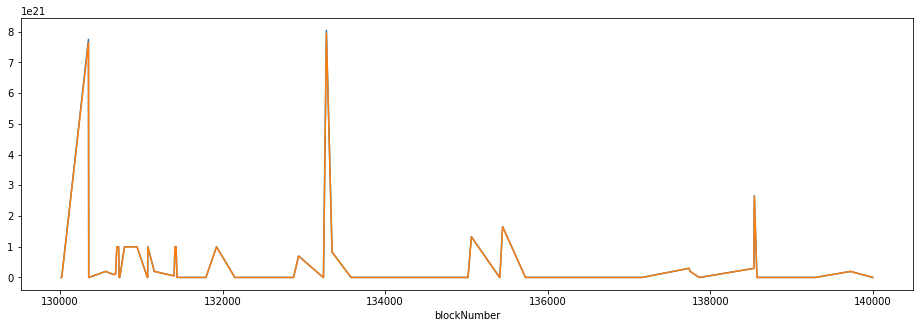

In [15]:
(df_exchange['sellamount']).plot()
(df_exchange['buyamount']).plot()

exchanger     0
buyamount     0
sellamount    0
soldgold      0
dtype: int64


exchanger     87
buyamount     87
sellamount    87
soldgold      87
dtype: int64

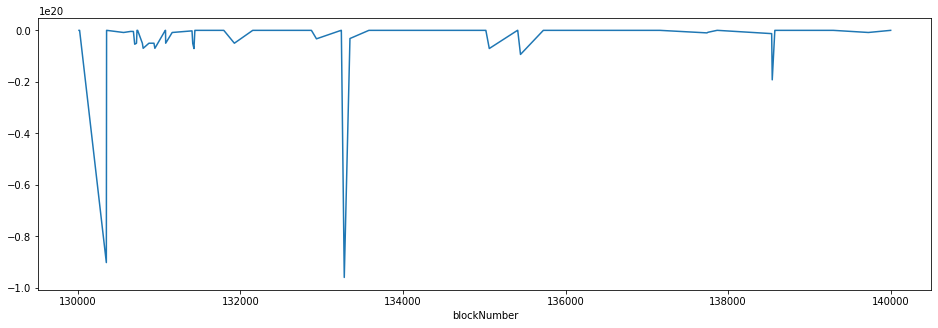

In [16]:
# difference
(df_exchange['buyamount']-df_exchange['sellamount']).plot()
print(df_exchange[df_exchange.soldgold].count())
df_exchange[df_exchange.soldgold == False].count()


In [17]:
df_ex = df_events.set_index('blockNumber')[['buyamount', 'sellamount', 'currentStableBucket', 'currentGoldBucket', 'soldgold']]
df_ex = df_ex[df_ex.buyamount.notna()]

Text(0, 0.5, 'currentGoldBucket')

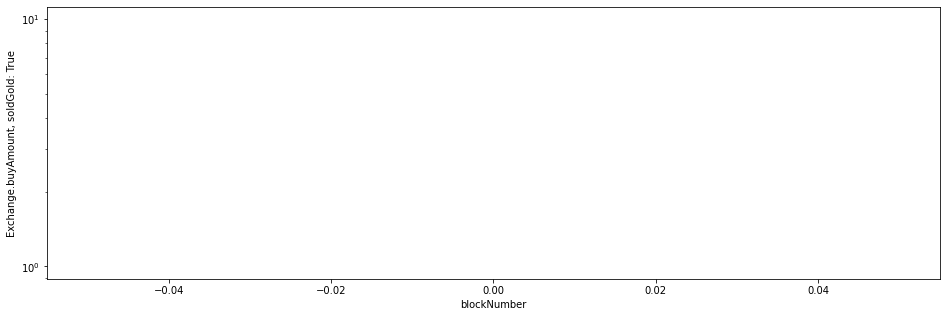

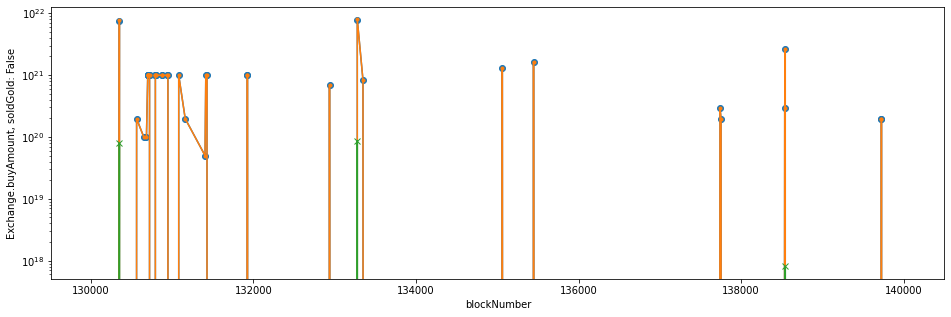

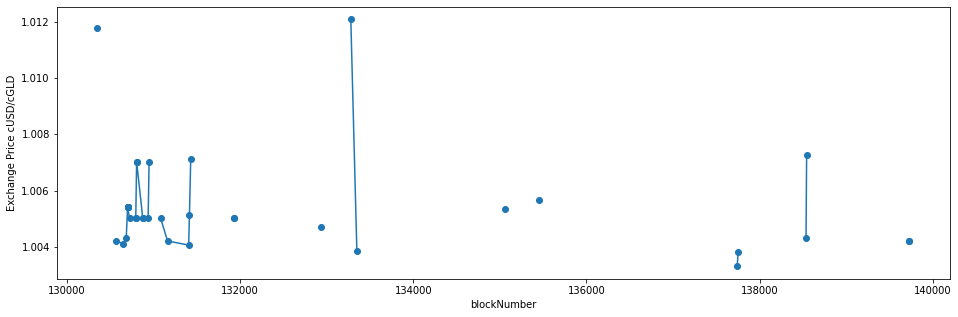

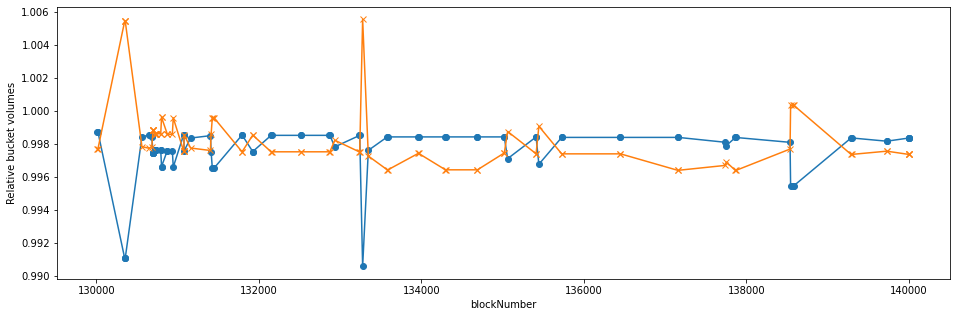

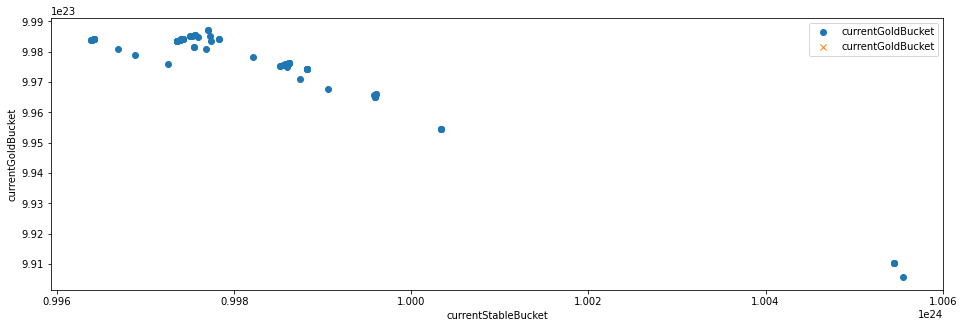

In [18]:
def estimate_buyamount(soldGold):
    df_buy = df_ex[df_ex.soldgold == soldGold]
    Ab = df_buy.buyamount
    As = df_buy.sellamount
    Bs = df_buy.currentStableBucket
    Bg = df_buy.currentGoldBucket
    Bbuy = Bs if soldGold else Bg
    Bsell = Bg if soldGold else Bs

    # buyamount computation is
    # Asell = (1-spread)*As
    # Abuy = Asell/(Bsell+Asell)*Bbuy
    spread = 0
    Asell = (1-spread)*As
    Abuy_hat = Asell/(Bsell+Asell)*Bbuy
    # Abuy_hat = Asell/(Bsell)*Bbuy
    
    return df_buy, Abuy_hat, Bbuy, Bsell


soldGold = True
df_buy_sellgold, Abuy_hat_sellgold, Bbuy_sellgold, Bsell_sellgold = estimate_buyamount(soldGold)
ax = Abuy_hat_sellgold.plot(marker='o')
ax.set_ylabel(f"Exchange.buyAmount, soldGold: {soldGold}")
df_buy_sellgold.buyamount.plot(marker='.')
(df_buy_sellgold.buyamount - Abuy_hat_sellgold).plot(marker='x', logy=True)

soldGold = False
df_buy_sellusd, Abuy_hat_sellusd, Bbuy_sellusd, Bsell_sellusd = estimate_buyamount(False)
plt.figure()
ax = Abuy_hat_sellusd.plot(marker='o')
ax.set_ylabel(f"Exchange.buyAmount, soldGold: {soldGold}")
df_buy_sellusd.buyamount.plot(marker='.')
(df_buy_sellusd.buyamount - Abuy_hat_sellusd).plot(marker='x', logy=True)

plt.figure()
ax = (df_buy_sellusd.sellamount/df_buy_sellusd.buyamount).plot(marker='o')
(df_buy_sellgold.buyamount/df_buy_sellgold.sellamount).plot(marker='x')
ax.set_ylabel(f"Exchange Price cUSD/cGLD")

plt.figure()
ax = (df_buy_sellusd.currentGoldBucket/1e24).plot(marker='o')
(df_buy_sellusd.currentStableBucket/1e24).plot(marker='x')
ax.set_ylabel(f"Relative bucket volumes")

fig, ax = plt.subplots(1, 1)
df_buy_sellusd.plot(x='currentStableBucket', y='currentGoldBucket', style='o', ax=ax)
df_buy_sellgold.plot(x='currentStableBucket', y='currentGoldBucket', style='x', ax=ax)
ax.set_ylabel(f"currentGoldBucket")

In [19]:
df_goldlocked = df_events[df_events.eventName == "GoldLocked"].set_index('blockNumber')[['account', 'value']]
df_goldlocked[['value']] = df_goldlocked[['value']].astype('float')
df_goldlocked.groupby('account').value.sum().sort_values(ascending=False)
df_goldlocked[df_goldlocked.account == "0x775a5C899Fd4A7CDD54e9f41738087748CfcB953"].groupby('account').value.sum().sort_values(ascending=False)

Series([], Name: value, dtype: float64)

In [20]:
df_receipt.head()

,blockNumber,from,address,topic
0,140000.0,0x73b49da41223585a650712363ba7878ed60a964d,0x5c7197E1147ebF98658A2a8Bc3D32BeBF1692829,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
1,140000.0,0x73b49da41223585a650712363ba7878ed60a964d,0x5c7197E1147ebF98658A2a8Bc3D32BeBF1692829,0x00000000000000000000000073b49da41223585a6507...
2,140000.0,0x73b49da41223585a650712363ba7878ed60a964d,0x5c7197E1147ebF98658A2a8Bc3D32BeBF1692829,0x000000000000000000000000c8fd77490a12f46709bf...
3,140000.0,0x73b49da41223585a650712363ba7878ed60a964d,0x14D449EF428e679da48B3e8CfFa9036fF404B28A,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
4,140000.0,0x73b49da41223585a650712363ba7878ed60a964d,0x14D449EF428e679da48B3e8CfFa9036fF404B28A,0x0000000000000000000000001726428a6d575fdc9c7c...


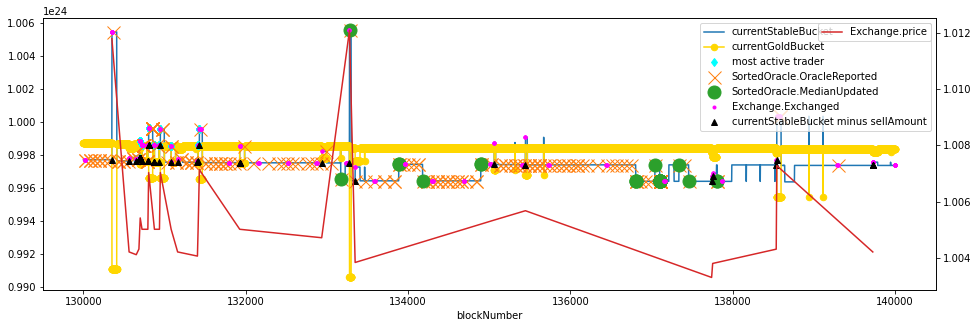

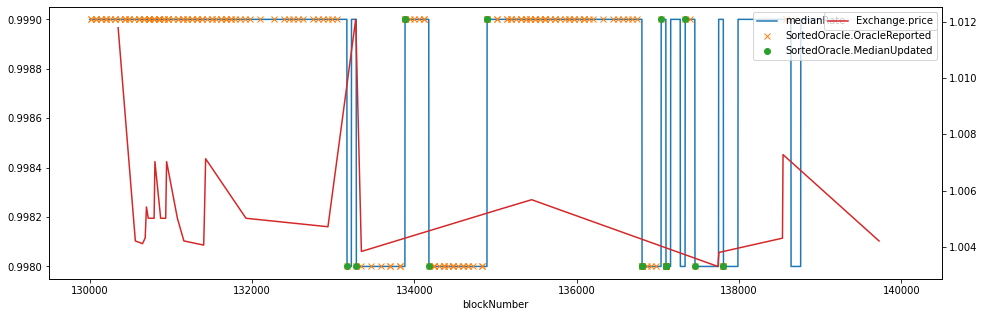

In [21]:
SortedOraclesAddress = '0x91061bF2F509AF76aa01F46E9F3E97577a5a80BA'
OracleReported = '0xdbf09271932e018b9c31e9988e4fbe3109fdd79d78f5d19a764dfb56035ed775'
MedianUpdated = '0x01f3db74cdcb3b158f2144fb78c5ab54e9e8a8c09d3d3b7713050cdb6b6bcb97'
Exchange = '0xC8FD77490A12F46709BffbCC0FCe35740Da8D860'
Exchanged = '0x402ac9185b4616422c2794bf5b118bfcc68ed496d52c0d9841dfa114fdeb05ba'

def filter_event(_df, event, arg='topic'):
    df_event_matches = _df[_df[arg] == event]
    return df_event_matches \
        .merge(df_events, left_on='blockNumber', right_on='blockNumber', suffixes=('_receipt', '')) \
        .merge(df_state, left_on='blockNumber', right_on='blockNumber', suffixes=('', '_state'))

df_report = filter_event(df_receipt, OracleReported)
df_median = filter_event(df_receipt, MedianUpdated)
df_exchanged = filter_event(df_receipt, Exchanged)

df_price = df_buy_sellusd[df_buy_sellusd.index>=window_min]
df_price = df_price[df_price.index<=window_max]
df_price = df_price[df_price.sellamount>0]
price_exchange = df_price.sellamount/df_price.buyamount

df_exchangers = df_exchanged.groupby('from_receipt').count().sort_values(by='blockNumber', ascending=False)
top_exchanger = df_exchangers.index[0] if len(df_exchangers.index) else None

df_active_trader = filter_event(df_receipt, top_exchanger, 'from')
df_active_trader = df_active_trader[df_active_trader.sellamount>0]
fig, ax = plt.subplots()
df_state.set_index('blockNumber').currentStableBucket.plot(ax=ax)
df_state.set_index('blockNumber').currentGoldBucket.plot(ax=ax, marker=".", ms=13, color='gold')
df_active_trader.set_index('blockNumber').currentStableBucket.plot(ax=ax, marker="d", linestyle='None', label="most active trader", color="cyan")
df_report.set_index('blockNumber').currentStableBucket.plot(ax=ax, marker="x", ms=13, linestyle='None', label="SortedOracle.OracleReported")
df_median.set_index('blockNumber').currentStableBucket.plot(ax=ax, marker="o", ms=13, linestyle='None', label="SortedOracle.MedianUpdated")
df_exchanged.set_index('blockNumber').currentStableBucket.plot(ax=ax, marker=".", linestyle='None', label="Exchange.Exchanged", color="magenta")
df_volumes = df_exchanged.set_index('blockNumber')
df_volumes = df_volumes[df_volumes.sellamount>0]
(df_volumes.currentStableBucket - df_volumes.sellamount).plot(ax=ax, marker="^", linestyle='None', color="black", label="currentStableBucket minus sellAmount")
price_exchange.plot(ax=ax, secondary_y=True, label='Exchange.price')
[ax.legend(loc=1) for ax in plt.gcf().axes]

fig, ax = plt.subplots()
df_state.set_index('blockNumber').medianRate.plot(ax=ax)
df_report.set_index('blockNumber').medianRate.plot(ax=ax, marker="x", linestyle='None', label="SortedOracle.OracleReported")
df_median.set_index('blockNumber').medianRate.plot(ax=ax, marker="o", linestyle='None', label="SortedOracle.MedianUpdated")
price_exchange.plot(ax=ax, secondary_y=True, label='Exchange.price')
[ax.legend(loc=1) for ax in plt.gcf().axes]

In [22]:
df_exchangers.head()

,blockNumber,address_receipt,topic,address,eventName,identifier,addr,identifierhash,slasheridentifier,account,...,medianRate_state,currentStableBucket_state,currentGoldBucket_state,goldTokenTotalSupply_state,timestamp_block_state,gasUsed_state,gasLimit_state,txAmount_state,blocktime_state,datetime_block_state
from_receipt,,,,,,,,,,,,,,,,,,,,,
0x8fb800b94d2b1258236e598fcd5e65eaf45ca671,254,254,254,254,254,0,0,0,0,0,...,254,254,254,254,254,254,254,254,254,254
0x73b49da41223585a650712363ba7878ed60a964d,124,124,124,124,124,1,0,0,0,1,...,124,124,124,124,124,124,124,124,124,124
0xd6f05649c5350c20030de1dc57ed31510141f487,69,69,69,69,69,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69
0xcbebe96dd4811243e23b1f7b43d7c3266c59af2f,52,52,52,52,52,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
0x93c110dc9812dc075c1541b2c5d1030b2ad6c293,34,34,34,34,34,0,0,0,0,0,...,34,34,34,34,34,34,34,34,34,34


In [23]:
r = df_state.set_index('blockNumber').currentGoldBucket.diff()
r[r>0].diff()

blockNumber
130411.0             NaN
130623.0   -7.387113e+21
130711.0    9.872323e+20
130782.0   -1.967742e+20
130854.0    9.830876e+20
130935.0   -9.830876e+20
130997.0    9.830875e+20
131136.0   -9.830875e+20
131221.0   -7.904581e+20
131383.0    0.000000e+00
131465.0    1.822648e+21
131986.0   -1.032190e+21
132996.0   -2.953099e+20
133170.0    0.000000e+00
133299.0    7.178837e+21
133408.0   -7.052157e+21
133466.0    0.000000e+00
135073.0    4.896762e+20
135077.0    0.000000e+00
135318.0    0.000000e+00
135469.0    3.247611e+20
135672.0    0.000000e+00
137800.0   -1.143630e+21
138596.0    2.418405e+21
138940.0    0.000000e+00
139114.0    0.000000e+00
139786.0   -2.711928e+21
139946.0    0.000000e+00
Name: currentGoldBucket, dtype: float64